In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


In [4]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'


In [5]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [6]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
print(data.shape)

(44898, 5)


In [7]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,What will be in Obama's final budget proposal?,(Reuters) - President Barack Obama is set on T...,politicsNews,true
1,U.S. welcomes royal order to allow Saudi women...,WASHINGTON (Reuters) - The United States on Tu...,worldnews,true
2,Russia says need to prevent new sanctions agai...,MOSCOW (Reuters) - It is necessary to prevent ...,worldnews,true
3,SORRY MITT…GOP Rules Say You’re Not Qualified ...,You can t blame the guy who had the whole elec...,politics,fake
4,OBAMA’S OPEN BORDERS Crisis Just Got Real…WHO ...,We recently reported about the deadly Zika vir...,politics,fake


In [8]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,title,text,subject,target
0,What will be in Obama's final budget proposal?,Reuters President Barack Obama is set on Tues...,politicsNews,true
1,U.S. welcomes royal order to allow Saudi women...,WASHINGTON Reuters The United States on Tuesd...,worldnews,true
2,Russia says need to prevent new sanctions agai...,MOSCOW Reuters It is necessary to prevent new...,worldnews,true
3,SORRY MITT…GOP Rules Say You’re Not Qualified ...,You can t blame the guy who had the whole elec...,politics,fake
4,OBAMA’S OPEN BORDERS Crisis Just Got Real…WHO ...,We recently reported about the deadly Zika vir...,politics,fake


In [9]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omprakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


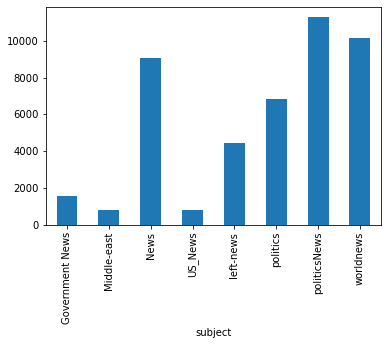

In [10]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


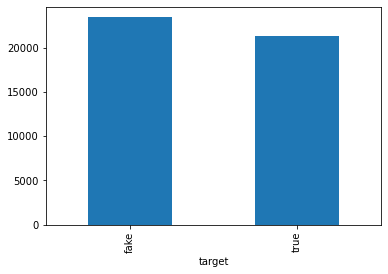

In [11]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

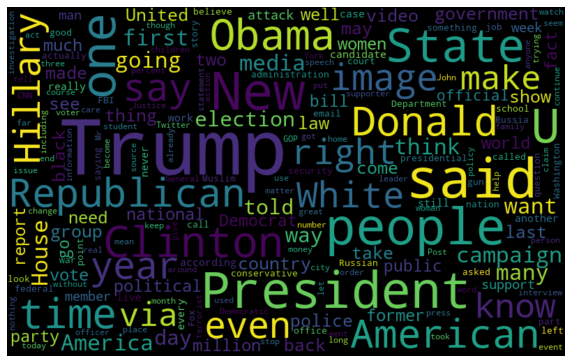

In [12]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

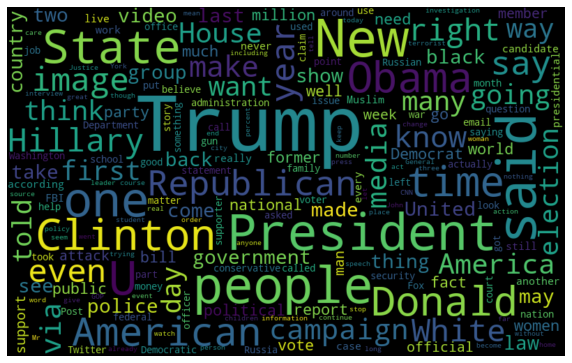

In [13]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

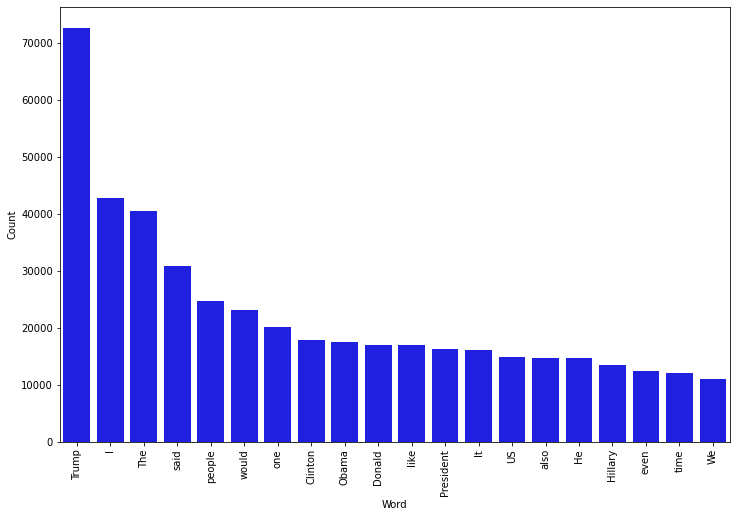

In [15]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

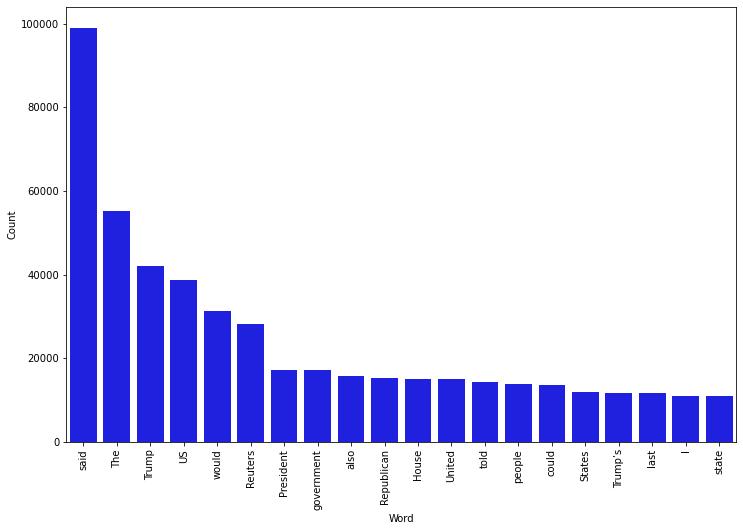

In [16]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(data['text'], data['target'], test_size=0.2, random_state=7)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
df=pd.DataFrame(y_test)
df["ans"]=y_pred
df

Accuracy: 99.54%


,target,ans
25168,fake,fake
5096,true,true
3123,true,true
37809,fake,fake
27507,true,true
...,...,...
39989,true,true
14706,true,true
4979,fake,fake
20228,fake,fake


In [31]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

NameError: name 'confusion_matrix' is not defined

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
lr=LogisticRegression(max_iter=50)
lr.fit(tfidf_train,y_train)
y_pre=lr.predict(tfidf_test)
scor=accuracy_score(y_test,y_pre)
print(f'Accuracy: {round(scor*100,2)}%')

Accuracy: 98.56%


In [24]:
rf=RandomForestClassifier()
rf.fit(tfidf_train,y_train)
y_p=rf.predict(tfidf_test)
sc=accuracy_score(y_test,y_p)
print(f'Accuracy: {round(sc*100,2)}%')

Accuracy: 99.09%


In [25]:
knn=KNeighborsClassifier()
knn.fit(tfidf_train,y_train)
y_=knn.predict(tfidf_test)
var=["modi speaks with people today at 6pm"]
s=accuracy_score(y_test,y_)
print(f'Accuracy: {round(sc*100,2)}%')

Accuracy: 99.09%


In [26]:
dt=DecisionTreeClassifier()
dt.fit(tfidf_train,y_train)
y_pr=dt.predict(tfidf_test)
sco=accuracy_score(y_test,y_pr)
print(f'Accuracy: {round(sco*100,2)}%')

Accuracy: 99.57%
